In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
# Fetch DF with english tweets only
eng = pd.read_csv('./data/nft_verified_tweets_english.csv', lineterminator='\n')

In [3]:
tweets = eng['tweet']

In [4]:
tweets.sample(3)

42821    Wishing each and everyone of you a #HappyNewYe...
5519     "Ups &amp; Downs" is also available at this ye...
20183                 #NFTs are real! I could say 1 of 1 !
Name: tweet, dtype: object

In [5]:
# Convert the tweets to string format
stream = tweets.to_string()

## Create WordCloud of Tweets

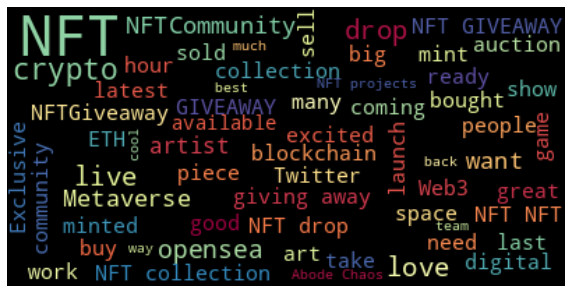

In [6]:
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

exclude = set(STOPWORDS)
exclude.update(['Thank', 'project', 'day', 'https', 'time', 'Join', 'know',\
               'amp', 'will', 'see', 'one', 'week', 'Check', 'going', 'Let',\
                'first', 'world', 'think', 'new', 'amazing', 'another', 'today',\
                'tomorrow', 'now', 'next', 'Let', 'look', 'looking', 'Hey', 'well',\
                'welcome', 'say', 'still', 'guy', 'right', 'Thanks', 'everyone', 'withFND',\
                'thing', 'minting', 'guys', 'come', 'make', 'talk', 'year', 'friend', 'really',\
                'start', 'made', 'get', 'got'
               ])

wc_params = {
    'min_font_size': 10,
    'max_font_size':40, 
    'max_words': 150,
    'stopwords': exclude,
    'collocations': True,
    'colormap': 'Spectral',
    'min_word_length': 3,
    'random_state': 42,
    'collocation_threshold': 50
}
wordcloud = WordCloud(**wc_params).generate(stream)
plt.figure(figsize= (10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Sentiment Analysis

In [7]:
import vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [8]:
# Create sentiment object
sentimeter = SentimentIntensityAnalyzer()

In [9]:
samples = tweets.sample(1)
print(f'Tweet: \n {samples}')
print('Polarity Score: ')
sentimeter.polarity_scores(samples)

Tweet: 
 32379    Not Financial Tokens #nft #NFTs $art
Name: tweet, dtype: object
Polarity Score: 


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [10]:
# Evaluate Compound Score for all records
compound_scores = tweets.apply(lambda x: sentimeter.polarity_scores(x)['compound'])

In [18]:
# Store sentiment scores to a dataframe
score_df = pd.DataFrame(data= {'tweet': tweets, 'compound_score': compound_scores})
score_df.sample(7)

,tweet,compound_score
7782,#NFT The reason why BOA Financial Group chose ...,0.4767
61032,A recent review done by reviewers from the Tur...,0.0000
24186,Good night ❤️ Mother’s heart #2 #nfts #nft #nf...,0.7964
74294,My FAVORITE MAN (besides Jesus) in the year '5...,0.7969
46429,@jf_nft Honored to have one of my favorite wor...,0.9682
79429,Tomorrow we have an #AMA with one of our new i...,0.7430
17071,Crypto . Com va lansa un NFT Marketplace pentr...,0.3818


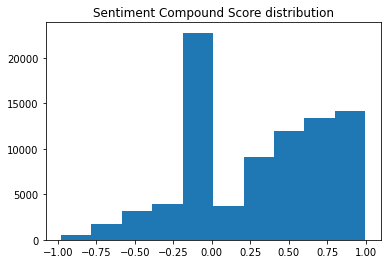

In [19]:
# Plot the compound score distribution
plt.hist(score_df['compound_score'], bins= 10)
plt.title('Sentiment Compound Score distribution')
plt.show()

In [17]:
# Set a threshold for sentiment based on compound score
def get_sentiment(record):
    if record > 0.3:
        return 'positive'
    elif record < -0.3:
        return 'negative'
    else:
        return 'neutral'

In [21]:
sentiment = score_df['compound_score'].apply(lambda x: get_sentiment(x))

In [22]:
# Store sentiment scores to a dataframe
sentiment_df = pd.DataFrame(data= {'tweet': tweets, 'sentiment': sentiment})
sentiment_df.sample(7)

,tweet,sentiment
51037,I don't know what an #nft is but here's some o...,positive
18803,"""Digital Jazz, Man!"" @IOHK_Charles is the Kev...",neutral
33016,"🚨There's something expensive, on #OpenSea. 📞W...",neutral
29748,Hi there @veefriends i would love to win book ...,positive
67181,EXCLUSIVE: Come On Down And Get @PriceIsRight ...,positive
53944,Somebody liberate the apes https://t.co/PXDAi...,neutral
9371,We are dropping our first ever #NFT.🙌For a cha...,positive


In [26]:
print('Sentiment Label distribution: ')
sentiment_df['sentiment'].value_counts(normalize= True)

Sentiment Label distribution: 


positive    0.537457
neutral     0.376848
negative    0.085695
Name: sentiment, dtype: float64